### Sensor Constants

In [72]:
sensor_name = 'alpha_so2_conc'

## Upload Data from File

In [73]:
import pandas as pd

directory_path = 'input/'
file_name = sensor_name + '_and_temp_valid.csv'
df = pd.read_csv(directory_path + file_name)
df.head()

,DateTime,measuring 1,measuring 2,temperature,Hour,raw measuring 1,Trend,Seasonal Component,Trend and Seasonal Component,Residuals,Trend 2,Seasonal Component 2,Trend and Seasonal Component 2,Residuals 2
0,2022-12-07 18:30:00,205.405270,177.433574,28.075,18,410.810540,NaN,-270.156243,NaN,NaN,NaN,-8.635624,NaN,NaN
1,2022-12-07 18:45:00,414.182865,178.796130,27.920,18,553.367929,NaN,-147.400762,NaN,NaN,NaN,-7.262469,NaN,NaN
2,2022-12-07 19:00:00,651.675515,180.381411,27.730,19,800.108422,NaN,-82.902694,NaN,NaN,NaN,-8.008515,NaN,NaN
3,2022-12-07 19:15:00,1251.360586,184.076033,27.500,19,1622.594200,NaN,-162.895141,NaN,NaN,NaN,-6.224266,NaN,NaN
4,2022-12-07 19:30:00,2263.521347,189.107008,27.270,19,2889.220727,NaN,-190.123041,NaN,NaN,NaN,1.285820,NaN,NaN


### Create Sensor Dataframe as Pandas Series

In [74]:
# Remove the first column with the indexes and save data into web dataframe
dataframe = df.drop(df.columns[0], axis='columns')
dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))

# Resample data with 15 mins period and create sensor dataframe
sensor_dataframe = dataframe.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_dataframe.index = sensor_dataframe['DateTime']
sensor_dataframe = sensor_dataframe.drop(columns=['DateTime'])
sensor_dataframe.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_1130/580442286.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataframe['DateTime'] = (pd.to_datetime(df['DateTime'], infer_datetime_format=True))


,measuring 1,measuring 2,temperature,Hour,raw measuring 1,Trend,Seasonal Component,Trend and Seasonal Component,Residuals,Trend 2,Seasonal Component 2,Trend and Seasonal Component 2,Residuals 2
DateTime,,,,,,,,,,,,,
2022-12-07 18:30:00,205.405270,177.433574,28.075,18,410.810540,NaN,-270.156243,NaN,NaN,NaN,-8.635624,NaN,NaN
2022-12-07 18:45:00,414.182865,178.796130,27.920,18,553.367929,NaN,-147.400762,NaN,NaN,NaN,-7.262469,NaN,NaN
2022-12-07 19:00:00,651.675515,180.381411,27.730,19,800.108422,NaN,-82.902694,NaN,NaN,NaN,-8.008515,NaN,NaN
2022-12-07 19:15:00,1251.360586,184.076033,27.500,19,1622.594200,NaN,-162.895141,NaN,NaN,NaN,-6.224266,NaN,NaN
2022-12-07 19:30:00,2263.521347,189.107008,27.270,19,2889.220727,NaN,-190.123041,NaN,NaN,NaN,1.285820,NaN,NaN


### Plot raw data

<Axes: xlabel='DateTime'>

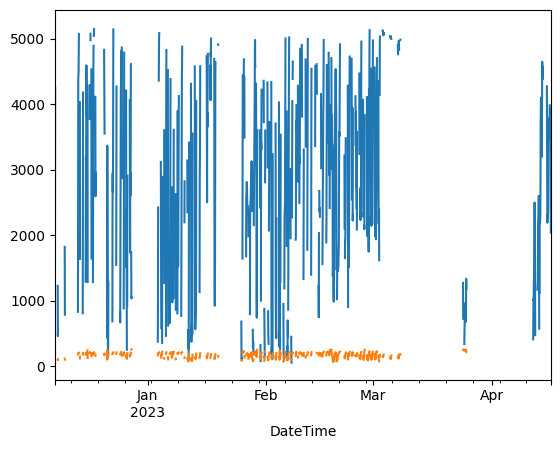

In [75]:
sensor_dataframe['measuring 1'].resample('1H').mean().plot()
sensor_dataframe['measuring 2'].resample('1H').mean().plot()

## Compare with original data

In [76]:
input_data_directory = 'input/'
reference_data_path = input_data_directory + 'ref_air_quality_data_Vila_Moema.csv'
reference_column_name = 'Dióxido de Enxofre'

## Load reference and sensor data

In [77]:
import pandas as pd

reference_data = pd.read_csv(reference_data_path)
reference_data['DateTime'] = (pd.to_datetime(reference_data['DateTime'], infer_datetime_format=True))
reference_data = reference_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
reference_data.index = reference_data['DateTime']
reference_data = reference_data.drop(columns='DateTime')[reference_column_name]

sensor_data = sensor_dataframe
reference_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_1130/1347629147.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  reference_data['DateTime'] = (pd.to_datetime(reference_data['DateTime'], infer_datetime_format=True))


DateTime
2022-01-01 02:30:00    4.46
2022-01-01 03:30:00    4.33
2022-01-01 04:30:00    4.48
2022-01-01 05:30:00    4.44
2022-01-01 06:30:00    4.58
Name: Dióxido de Enxofre, dtype: float64

## Merge sensor and reference data

In [78]:
merged_data = pd.concat([sensor_data, reference_data], axis=1, join='inner')
sensor_data = merged_data.rename(columns={'Dióxido de Enxofre': 'reference'})
sensor_data.head()

,measuring 1,measuring 2,temperature,Hour,raw measuring 1,Trend,Seasonal Component,Trend and Seasonal Component,Residuals,Trend 2,Seasonal Component 2,Trend and Seasonal Component 2,Residuals 2,reference
DateTime,,,,,,,,,,,,,,
2022-12-07 18:30:00,205.405270,177.433574,28.075,18,410.810540,NaN,-270.156243,NaN,NaN,NaN,-8.635624,NaN,NaN,6.36
2022-12-07 19:30:00,2263.521347,189.107008,27.270,19,2889.220727,NaN,-190.123041,NaN,NaN,NaN,1.285820,NaN,NaN,5.80
2022-12-08 12:30:00,1668.865447,92.968223,33.895,12,73.119455,NaN,254.142136,NaN,NaN,NaN,13.354303,NaN,NaN,42.74
2022-12-08 13:30:00,428.352790,112.450149,34.055,13,431.340586,NaN,288.516420,NaN,NaN,NaN,7.154549,NaN,NaN,107.07
2022-12-10 08:30:00,1577.459639,111.022086,32.550,8,1224.583823,NaN,33.382525,NaN,NaN,NaN,1.017308,NaN,NaN,7.88


### Plot reference and sensor data

<Axes: xlabel='DateTime'>

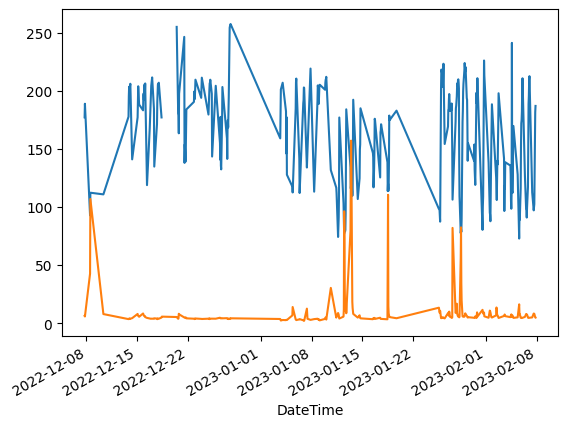

In [79]:
sensor_data['measuring 2'].plot()
sensor_data['reference'].plot()

<Axes: >

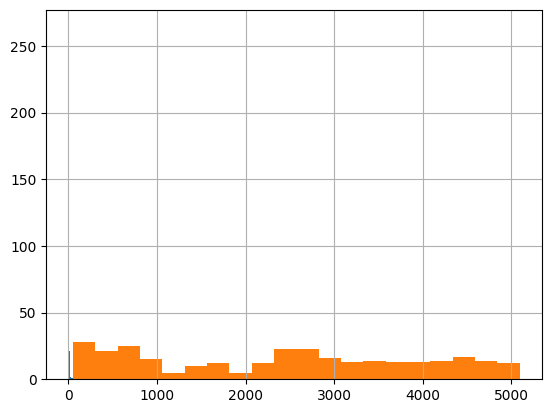

In [80]:
sensor_data['reference'].hist(bins=20)
sensor_data['measuring 1'].hist(bins=20)

## Plot sensor vs. reference

### Sensor 1

Spearmans correlation coefficient: -0.396
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: -0.396
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=-0.262, p<0.05")

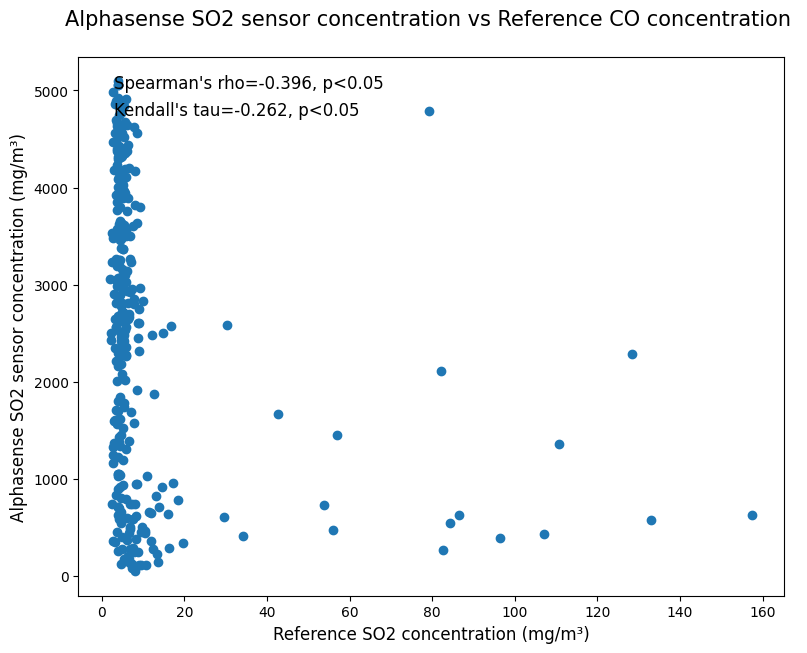

In [81]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(sensor_data['reference'], sensor_data['measuring 1'])
plt.title('Alphasense SO2 sensor concentration vs Reference CO concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference SO2 concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(sensor_data['reference'], sensor_data['measuring 1'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(sensor_data['reference'], sensor_data['measuring 1'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

Spearmans correlation coefficient: -0.249
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: -0.249
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=-0.152, p<0.05")

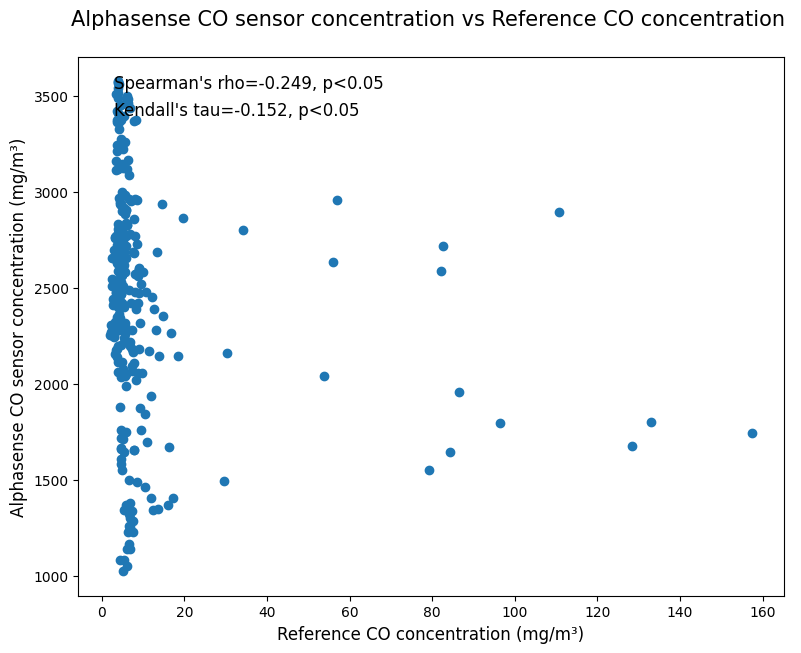

In [82]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(sensor_data['reference'], sensor_data['Trend'])
plt.title('Alphasense CO sensor concentration vs Reference CO concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference CO concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense CO sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(sensor_data['reference'], sensor_data['Trend'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(sensor_data['reference'], sensor_data['Trend'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

### Sensor 2

Spearmans correlation coefficient: -0.478
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: -0.478
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=-0.330, p<0.05")

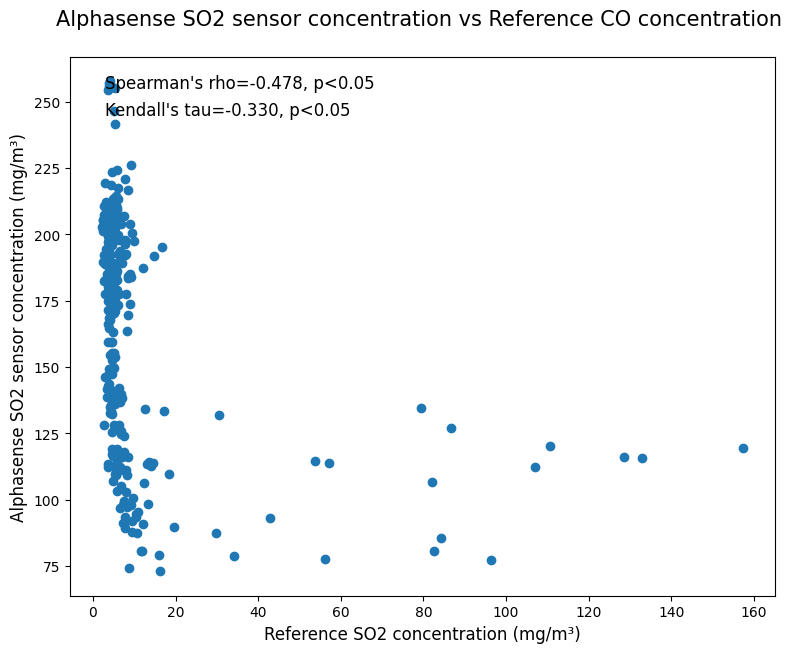

In [83]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(sensor_data['reference'], sensor_data['measuring 2'])
plt.title('Alphasense SO2 sensor concentration vs Reference CO concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference SO2 concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(sensor_data['reference'], sensor_data['measuring 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(sensor_data['reference'], sensor_data['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

Spearmans correlation coefficient: -0.482
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: -0.482
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=-0.332, p<0.05")

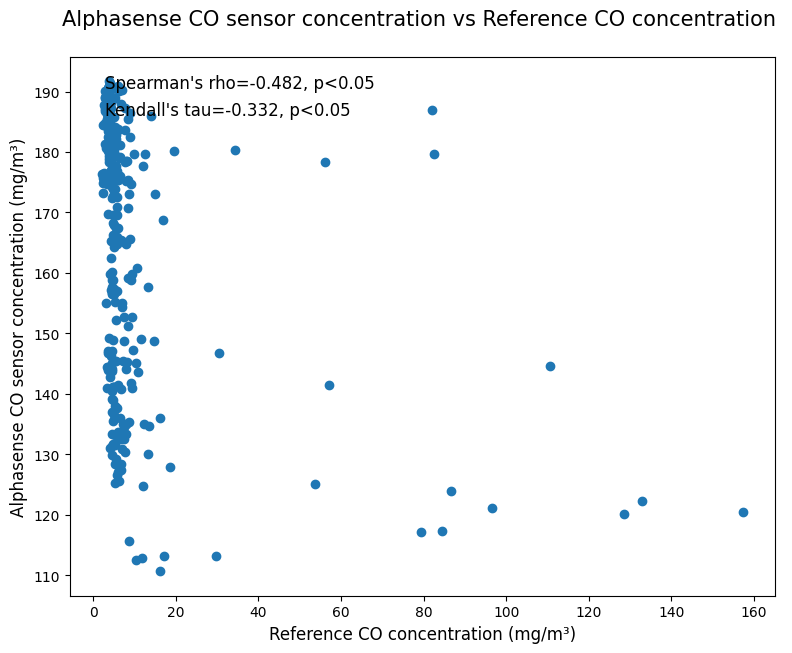

In [84]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))

plt.scatter(sensor_data['reference'], sensor_data['Trend 2'])
plt.title('Alphasense CO sensor concentration vs Reference CO concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Reference CO concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
plt.ylabel('Alphasense CO sensor concentration (mg/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(sensor_data['reference'], sensor_data['Trend 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(sensor_data['reference'], sensor_data['Trend 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

## Calibrate data

### Prepare training and test sets

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

reference_median = sensor_data['reference'].median()
sensor_1_median = sensor_data['measuring 1'].median()
sensor_2_median = sensor_data['measuring 2'].median()
temperature_mean = sensor_data['temperature'].mean()
trend_1_median = sensor_data['Trend'].median()
trend_2_median = sensor_data['Trend 2'].median()
trend_season_1_median = sensor_data['Trend and Seasonal Component'].median()
trend_season_2_median = sensor_data['Trend and Seasonal Component 2'].median()

y = sensor_data['reference'].fillna(value=reference_median).values.reshape(-1,1)
X = (sensor_data[['measuring 1','measuring 2',
                    'Trend','Trend 2',
                    'Trend and Seasonal Component',
                    'Trend and Seasonal Component 2',
                    'temperature']].fillna(value={
                        'measuring 1': sensor_1_median,
                        'measuring 2': sensor_2_median,
                        'Trend': trend_1_median,
                        'Trend 2': trend_2_median,
                        'Trend and Seasonal Component': trend_season_1_median,
                        'Trend and Seasonal Component 2': trend_season_2_median,
                        'temperature': temperature_mean}).values.reshape(-1,7))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Grid search with different models and variables combinations

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import  MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

# Define different subsets of input variables
feature_subsets = {
    'SO2_1': [0],
    'SO2_1 and SO2_2': [0, 1],
    'SO2_1 and temperature': [0, 6],
    'SO2_1, SO2_2 and temperature': [0, 1, 6],
    'SO2_2': [1],
    'SO2_2 and temperature': [1, 6],
    'Trend 1': [2],
    'Trend 1 and 2': [2, 3],
    'Trend 1 and temperature': [2, 6],
    'Trend 1, 2 and temperature': [2, 3, 6],
    'Trend 1 and Seasonal 1': [2, 4],
    'Trend 1, Seasonal 1 and temperature': [2, 4, 6],
    'Trend 1, Seasonal 1 and Trend 2': [2, 3, 4],
    'Trend 1, Seasonal 1, Trend 2 and temperature': [2, 3, 4, 6],
    'Trend 1, Seasonal 1, Trend 2 and Seasonal 2': [2, 3, 4, 5],
    'Trend 1, Seasonal 1, Trend 2, Seasonal 2 and temperature': [2, 3, 4, 5, 6],
    'Trend 2': [3],
    'Trend 2 and temperature': [3, 6],
    'Trend 2 and Seasonal 2': [3, 5],
    'Trend 2, Seasonal 2 and temperature': [3, 5, 6],
    'Trend 2, Seasonal 2 and Trend 1': [3, 5, 2],
    'Trend 2, Seasonal 2, Trend 1 and temperature': [3, 5, 2, 6]
}
    
models = {
    # 'MLP Regression': (
    #     ('mlp_regressor', MLPRegressor(solver="lbfgs", max_iter=1000, random_state=42)), {
    #         'mlp_regressor__hidden_layer_sizes': [
    #             (4,),   (10,),   (50,),   (100,),  (200,),
    #             (4,4),  (4,10),  (4,50),  (4,100), (4,200),
    #             (10,4), (10,10), (10,50), (10,100),(10,200),
    #             (50,4), (50,10), (50,50), (50,100),(50,200), 
    #             (100,4),(100,10),(100,50),(100,100),(100,200),
    #             (200,4),(200,10),(200,50),(200,100),(200,200)],
    #         'mlp_regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
    #     }
    # ),
    'Multilinear Regression': (
        ('linear_regressor', LinearRegression()), { }
    ),
    'KNN Regression': (
        ('knn_regressor', KNeighborsRegressor()), {
            'knn_regressor__n_neighbors': [3, 5, 7], #[3, 5, 7, 9, 11, 13, 15, 17, 20],
            'knn_regressor__weights': ['uniform', 'distance'],
            'knn_regressor__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance'
        }
    ),
    # 'Random Forests Regression': (
    #     ('random_forest_regressor', RandomForestRegressor()), {
    #         'random_forest_regressor__n_estimators': [50, 100, 150],
    #         'random_forest_regressor__max_depth': [None, 10, 20, 30],
    #         'random_forest_regressor__min_samples_split': [2, 5, 10],
    #         'random_forest_regressor__min_samples_leaf': [1, 2, 4]
    #     }
    # )
}

# Perform grid search for each feature subset
results = {}
rmse_by_features = {}
r2_by_features = {}
mae_by_features = {}
for features_set, subset in feature_subsets.items():
    X_subset = X[:, subset]
    X_train_subset = X_train[:, subset]
    X_test_subset = X_test[:, subset]

    model_results = {}
    model_rmse = {}
    model_r2 = {}
    model_mae = {}
    for model_name, (model, param_grid) in models.items():
        print(f"Grid search for features: {features_set} with model: {model_name}...")
        
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            model
        ])
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_subset, y_train)

        # Print the best parameters and best score
        best_params = grid_search.best_params_

        # Evaluate the best model on the test set
        best_model = grid_search.best_estimator_
        cross_validation = cross_validate(best_model, X_subset, y, cv=10, scoring=['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])
        y_pred = best_model.predict(X_test_subset)

        # Evaluate the model
        r2 = cross_validation['test_r2']
        rmse = cross_validation['test_neg_root_mean_squared_error']
        mae = cross_validation['test_neg_mean_absolute_error']

        model_results[model_name] = {
            'Best Model': best_model,
            'Best Parameters': best_params,
            'Test R2': r2,
            'Test RMSE': rmse,
            'Test MAE': mae
        }
        model_rmse[model_name] = {
            'Mean': rmse.mean(),
            'Std': rmse.std()
        }
        model_r2[model_name] = {
            'Mean': r2.mean(),
            'Std': r2.std()
        }
        model_mae[model_name] = {
            'Mean': mae.mean(),
            'Std': mae.std()
        }

    results[features_set] = model_results
    rmse_by_features[features_set] = model_rmse
    r2_by_features[features_set] = model_r2
    mae_by_features[features_set] = model_mae

for feature_set, models in results.items():
    for model_name, result in models.items():
        print(f"\nResults for features: {feature_set} with model: {model_name}:")
        print(f"Best Parameters: {result['Best Parameters']}")
        print(f"Test RMSE: {result['Test RMSE'].mean()} +/- {result['Test RMSE'].std()}")
        print(f"Test R2: {result['Test R2'].mean()} +/- {result['Test R2'].std()}")
        print(f"Test MAE: {result['Test MAE'].mean()} +/- {result['Test MAE'].std()}")

Grid search for features: SO2_1 with model: Multilinear Regression...


Grid search for features: SO2_1 with model: KNN Regression...
Grid search for features: SO2_1 and SO2_2 with model: Multilinear Regression...
Grid search for features: SO2_1 and SO2_2 with model: KNN Regression...
Grid search for features: SO2_1 and temperature with model: Multilinear Regression...
Grid search for features: SO2_1 and temperature with model: KNN Regression...
Grid search for features: SO2_1, SO2_2 and temperature with model: Multilinear Regression...
Grid search for features: SO2_1, SO2_2 and temperature with model: KNN Regression...
Grid search for features: SO2_2 with model: Multilinear Regression...
Grid search for features: SO2_2 with model: KNN Regression...
Grid search for features: SO2_2 and temperature with model: Multilinear Regression...
Grid search for features: SO2_2 and temperature with model: KNN Regression...
Grid search for features: Trend 1 with model: Multilinear Regression...
Grid search for features: Trend 1 with model: KNN Regression...
Grid search 

# Save Results

In [88]:
output_directory_path = 'output/'
rmse_file_name = output_directory_path + sensor_name + '_rmse.csv'
r2_file_name = output_directory_path + sensor_name + '_r2.csv'
mae_file_name = output_directory_path + sensor_name + '_mae.csv'
results_file_name = output_directory_path + sensor_name + '_results.csv'

pd.DataFrame(rmse_by_features).transpose().to_csv(rmse_file_name)
pd.DataFrame(r2_by_features).transpose().to_csv(r2_file_name)
pd.DataFrame(mae_by_features).transpose().to_csv(mae_file_name)
pd.DataFrame(results).transpose().to_csv(results_file_name)